In [3]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)
#from scipy import stats
import warnings
warnings.filterwarnings("ignore")


In [36]:
df = pd.read_csv("C:\\Users\\sayak\\OneDrive\\Desktop\\IMP\\Personal\\Projects\\Iris Classification\\Iris.csv")

In [34]:
#Missing Values Check
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [37]:
print(df.head())
print(df.shape)
print(df.index)
print(df.columns)
print(df.info())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
(150, 5)
RangeIndex(start=0, stop=150, step=1)
Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null 

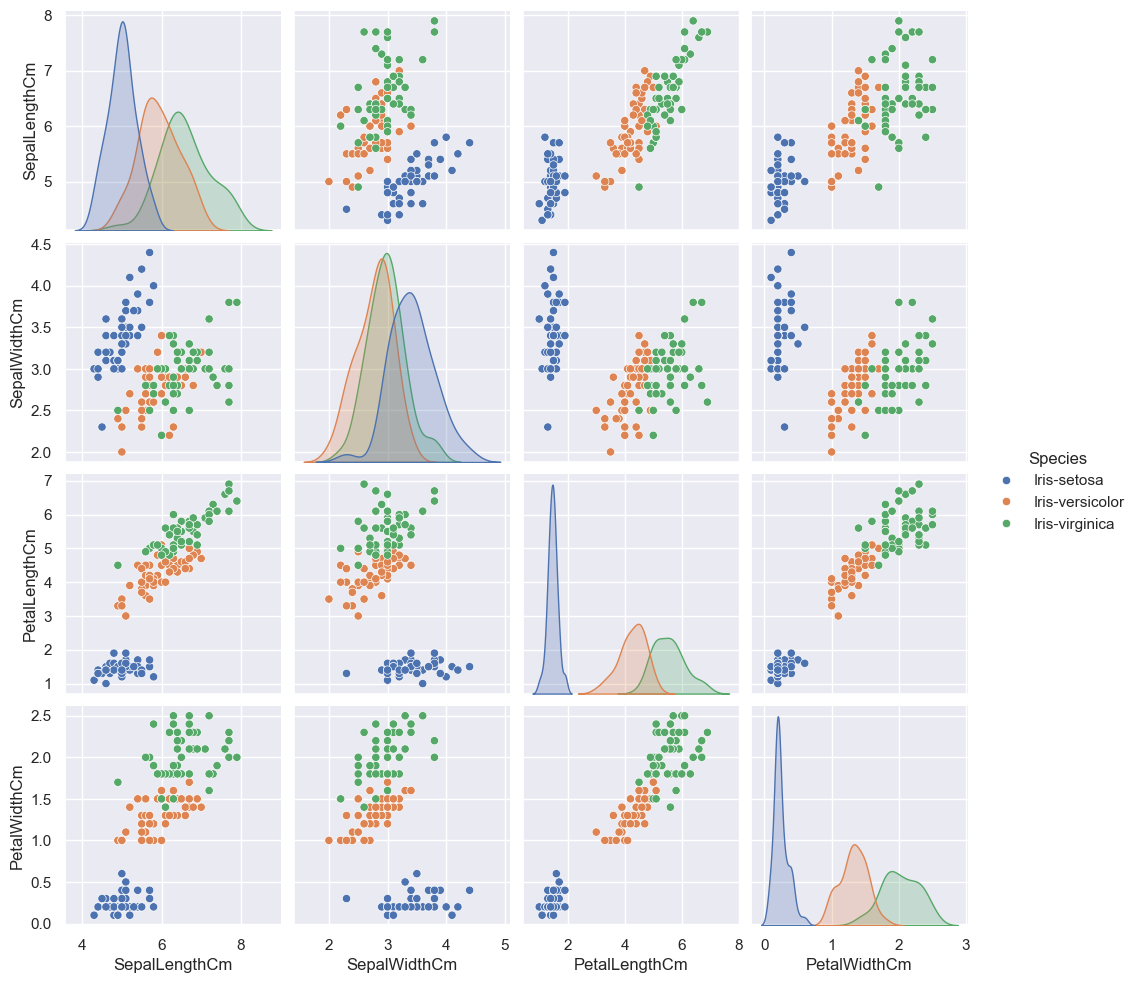

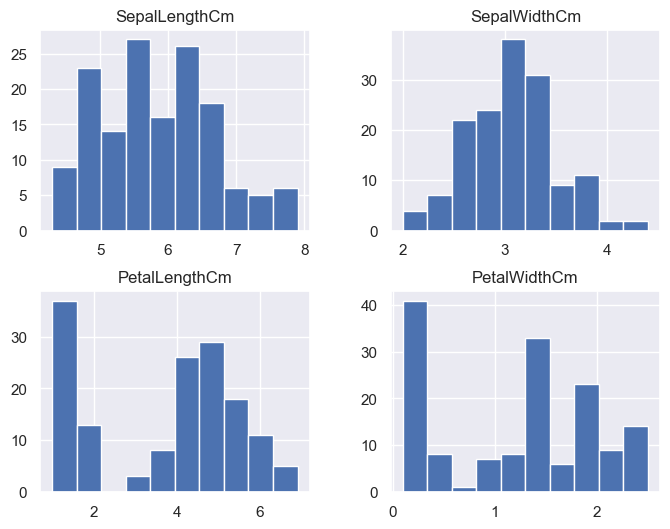

In [21]:
# Pairplot: Shows feature relationships grouped by species
sns.pairplot(df, hue="Species") 
plt.show()

# Histogram: Shows distribution of each feature
df.hist(figsize=(8, 6)) 
plt.show()



In [39]:
# Select only numeric columns (excluding 'species')
X_numeric = df.iloc[:, :-1]  
#print(X_numeric)
# Standardization
X_standardized = (X_numeric - np.mean(X_numeric, axis=0)) / np.std(X_numeric, axis=0)
print(X_standardized)
# Normalization
X_normalized = (X_numeric - np.min(X_numeric, axis=0)) / (np.max(X_numeric, axis=0) - np.min(X_numeric, axis=0))
print(X_normalized)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0        -0.900681      1.032057      -1.341272     -1.312977
1        -1.143017     -0.124958      -1.341272     -1.312977
2        -1.385353      0.337848      -1.398138     -1.312977
3        -1.506521      0.106445      -1.284407     -1.312977
4        -1.021849      1.263460      -1.341272     -1.312977
..             ...           ...            ...           ...
145       1.038005     -0.124958       0.819624      1.447956
146       0.553333     -1.281972       0.705893      0.922064
147       0.795669     -0.124958       0.819624      1.053537
148       0.432165      0.800654       0.933356      1.447956
149       0.068662     -0.124958       0.762759      0.790591

[150 rows x 4 columns]
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0         0.222222      0.625000       0.067797      0.041667
1         0.166667      0.416667       0.067797      0.041667
2         0.111111      0.500000       0.05084

In [4]:


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("Iris.csv")

# Separate features and labels
X = df.drop(columns=["Species"])
y = df["Species"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train) 

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Random Forest Accuracy: 0.9000

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



In [5]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

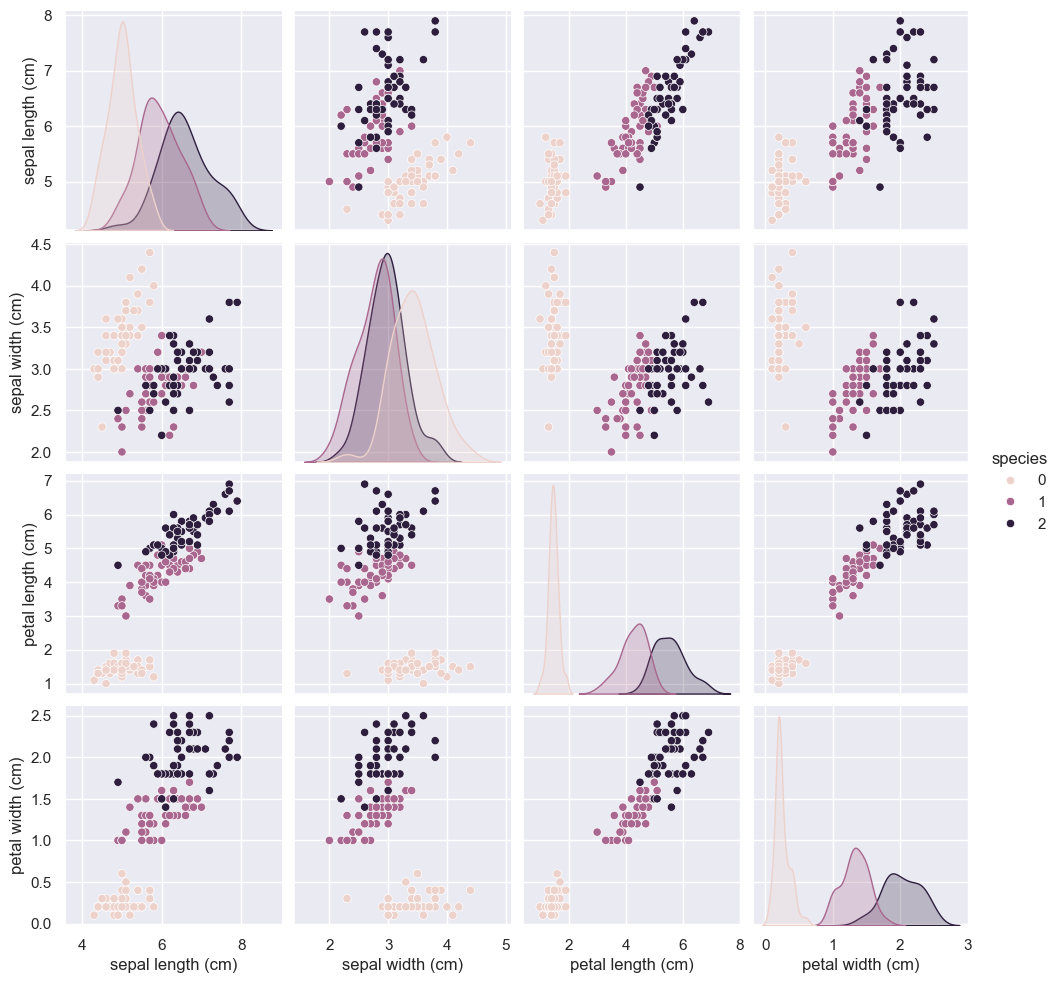

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



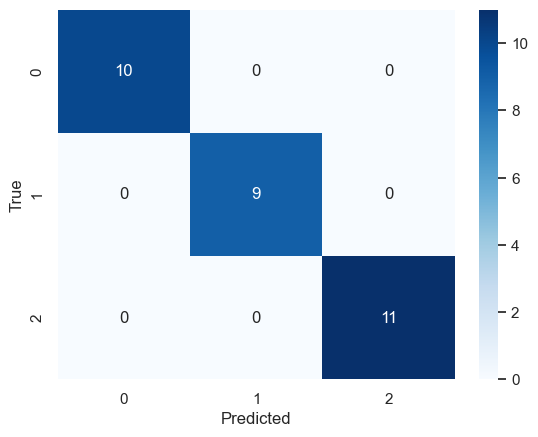

In [7]:
# Load the dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

sns.pairplot(df, hue='species')
plt.show()
 # Split the data into training and testing sets
X =df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
 # Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 # Train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
 # Make predictions
y_pred = knn.predict(X_test)
 # Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
 # Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()